In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)



In [2]:
N = 100

In [3]:
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real


In [4]:
x

array([10.6 , 11.52, 10.26, 10.84,  8.95,  9.79, 11.46,  9.39,  9.88,
        9.02,  9.92, 10.59, 10.31, 10.59,  9.81,  9.61, 10.15, 10.56,
        8.3 , 10.86,  9.87,  9.38,  9.12,  8.82, 10.71,  9.08, 10.39,
       10.4 ,  9.93,  9.77,  9.64,  9.27,  8.83,  9.85, 10.96, 10.22,
       10.62,  9.25, 11.9 , 11.3 , 11.84, 10.05,  8.78,  9.41,  9.57,
       10.01,  9.12, 11.87,  9.64,  9.96,  8.83,  8.97, 11.54, 10.72,
       10.53, 10.86, 10.07, 11.27,  9.48, 10.87, 10.03,  9.61,  9.53,
       10.18, 10.91, 10.29, 10.53, 11.11, 10.46, 10.31,  9.89,  9.16,
        9.25, 10.16,  7.66,  9.41, 11.21, 11.67,  9.32,  9.29, 10.56,
        8.98,  9.8 , 11.31,  9.96, 10.98, 10.57,  9.22,  9.59,  9.88,
        9.78, 10.6 , 10.66, 12.08, 10.9 ,  9.32, 10.  , 10.08,  8.64,
        8.93])

(array([ 1.,  1.,  9., 16., 15., 20., 17.,  9.,  7.,  5.]),
 array([ 7.66,  8.1 ,  8.54,  8.99,  9.43,  9.87, 10.31, 10.75, 11.2 ,
        11.64, 12.08]),
 <a list of 10 Patch objects>)

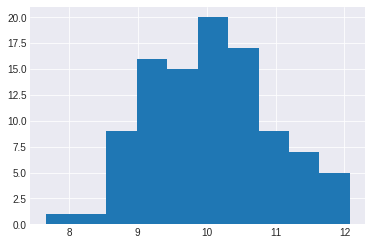

In [5]:
plt.hist(x)

(array([ 1.,  3.,  5., 12., 31., 17., 20.,  8.,  0.,  3.]),
 array([-1.66, -1.34, -1.02, -0.7 , -0.38, -0.06,  0.26,  0.58,  0.9 ,
         1.22,  1.54]),
 <a list of 10 Patch objects>)

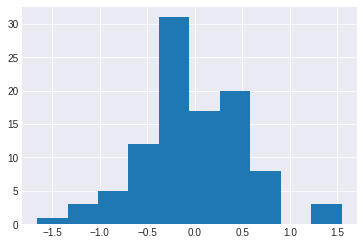

In [6]:
plt.hist(eps_real)

In [7]:
eps_real

array([ 9.63e-03,  6.52e-01, -2.70e-04,  4.61e-01,  5.43e-01,  5.44e-01,
       -8.01e-02,  5.71e-01, -1.37e-01, -7.64e-01,  8.27e-01,  6.52e-01,
       -8.02e-02,  8.74e-01, -6.30e-01, -2.27e-01, -4.01e-01, -8.39e-02,
       -6.06e-02,  3.09e-01, -1.99e-01,  1.13e-01, -5.12e-01,  1.07e-01,
        1.51e-01,  4.64e-01, -1.13e-01, -2.71e-01, -1.18e+00, -7.47e-01,
        4.82e-01, -5.62e-01,  2.69e-02, -8.44e-01, -3.28e-01, -1.13e+00,
       -2.75e-01, -4.99e-02, -1.31e-01,  6.80e-01,  1.84e-02, -1.13e+00,
       -3.30e-01, -1.59e-01, -4.66e-01, -5.52e-01, -1.23e-01, -2.35e-01,
       -1.93e-01, -9.32e-02, -5.87e-01,  4.24e-01,  1.54e+00, -5.88e-01,
       -1.06e-01, -9.75e-02, -2.84e-01,  2.45e-01,  2.77e-01,  4.60e-01,
       -3.40e-01, -7.61e-01, -4.53e-01, -7.19e-01,  5.00e-01,  1.28e+00,
       -6.67e-02,  3.16e-01,  5.35e-02,  2.23e-01,  3.13e-01,  2.01e-01,
        3.10e-01, -2.66e-01, -1.66e+00,  3.75e-01, -2.15e-01, -5.07e-02,
        3.40e-01,  5.54e-01,  1.31e+00, -4.39e-01, 

In [9]:
np.random.normal(10, 1, 10)

array([ 8.95, 10.88,  9.3 , 12.02, 10.03,  8.83,  8.77, 10.81,  9.59,
       10.29])

In [10]:
data = np.stack((x,y)).T

In [11]:
data

array([[10.6 , 12.05],
       [11.52, 13.52],
       [10.26, 11.74],
       [10.84, 12.72],
       [ 8.95, 11.1 ],
       [ 9.79, 11.86],
       [11.46, 12.73],
       [ 9.39, 11.52],
       [ 9.88, 11.26],
       [ 9.02,  9.85],
       [ 9.92, 12.26],
       [10.59, 12.69],
       [10.31, 11.7 ],
       [10.59, 12.9 ],
       [ 9.81, 10.7 ],
       [ 9.61, 10.93],
       [10.15, 11.24],
       [10.56, 11.92],
       [ 8.3 ,  9.91],
       [10.86, 12.58],
       [ 9.87, 11.18],
       [ 9.38, 11.06],
       [ 9.12, 10.2 ],
       [ 8.82, 10.54],
       [10.71, 12.29],
       [ 9.08, 11.14],
       [10.39, 11.74],
       [10.4 , 11.59],
       [ 9.93, 10.26],
       [ 9.77, 10.55],
       [ 9.64, 11.66],
       [ 9.27, 10.28],
       [ 8.83, 10.47],
       [ 9.85, 10.53],
       [10.96, 12.03],
       [10.22, 10.57],
       [10.62, 11.78],
       [ 9.25, 10.77],
       [11.9 , 13.08],
       [11.3 , 13.35],
       [11.84, 13.18],
       [10.05, 10.41],
       [ 8.78, 10.07],
       [ 9.